<a href="https://colab.research.google.com/github/leo-aguiar/Digits_Recognizer/blob/main/Digits_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries e datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_percentage_error, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
# Upload files

datasetTrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Harve Projetos/train.csv')
datasetTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Harve Projetos/test.csv')
datasetTrain

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


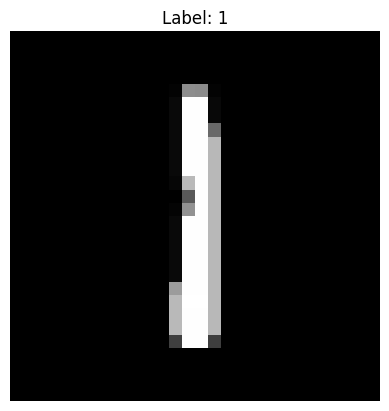

In [ ]:
# Checando visualmente os números
numberLabel = 2

# Separação dos Labels
datasetPixels = datasetTrain.drop(columns='label', axis=1)
datasetPixelsEdit = datasetPixels.iloc[numberLabel].to_numpy()
datasetPixelsEdit

# Exibindo o número
plt.imshow(datasetPixelsEdit.reshape(28, 28), cmap='gray') # Exibe o número
plt.title(f'Label: {datasetTrain["label"][numberLabel]}')  # Exibe o rótulo correspondente
plt.axis('off')  # Remove os eixos para melhor visualização
plt.show()

In [ ]:
# Checando se há nulos (não há)
datasetTrain.isnull().values.any()

np.False_

In [ ]:
# Separação das variáveis preditoras (X) e da variável alvo (Y)
Y = datasetTrain['label']
X = datasetPixels

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Conversão das classes para o formato one-hot encoding (necessário para classificação com softmax)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
# Criação do modelo sequencial (camadas empilhadas linearmente)
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7251 - loss: 5.8387 - val_accuracy: 0.8904 - val_loss: 0.4605
Epoch 2/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8865 - loss: 0.4420 - val_accuracy: 0.9226 - val_loss: 0.2894
Epoch 3/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9259 - loss: 0.2741 - val_accuracy: 0.9244 - val_loss: 0.2977
Epoch 4/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9400 - loss: 0.2194 - val_accuracy: 0.9198 - val_loss: 0.3023
Epoch 5/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9456 - loss: 0.2079 - val_accuracy: 0.9375 - val_loss: 0.2357
Epoch 6/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9501 - loss: 0.1801 - val_accuracy: 0.9437 - val_loss: 0.2484
Epoch 7/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9538 - loss: 0.1705 - val_accuracy: 0.9493 - val_loss: 0.2213
Epoch 8/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9564 - loss: 0

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       816
           1       0.97      0.99      0.98       909
           2       0.94      0.97      0.95       846
           3       0.91      0.95      0.93       937
           4       0.95      0.94      0.95       839
           5       0.96      0.92      0.94       702
           6       0.98      0.96      0.97       785
           7       0.96      0.95      0.95       893
           8       0.93      0.95      0.94       835
           9       0.93      0.91      0.92       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400

F1-score (macro): 0.9510
F1-score (micro): 0.9511


In [ ]:
pd.value_counts(datasetTrain['label']).sort_values()

<ipython-input-42-0107f85e0000>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(datasetTrain['label']).sort_values()


,count
label,
5,3795
8,4063
4,4072
0,4132
6,4137
2,4177
9,4188
3,4351
7,4401


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
1,896
3,892
7,845
2,817
8,795
0,793
4,786
9,765
6,757


In [ ]:
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza o f1_score macro por default
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['f1_score'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - f1_score: 0.7239 - loss: 3.5837 - val_f1_score: 0.8586 - val_loss: 0.5024
Epoch 2/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - f1_score: 0.8739 - loss: 0.4762 - val_f1_score: 0.8864 - val_loss: 0.4104
Epoch 3/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - f1_score: 0.9033 - loss: 0.3658 - val_f1_score: 0.9211 - val_loss: 0.3291
Epoch 4/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - f1_score: 0.9174 - loss: 0.3005 - val_f1_score: 0.9240 - val_loss: 0.2849
Epoch 5/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - f1_score: 0.9254 - loss: 0.2670 - val_f1_score: 0.9197 - val_loss: 0.3102
Epoch 6/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - f1_score: 0.9320 - loss: 0.2440 - val_f1_score: 0.9312 - val_loss: 0.2540
Epoch 7/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - f1_score: 0.9370 - loss: 0.2213 - val_f1_score: 0.9250 - val_loss: 0.2702
Epoch 8/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - f1_score: 0.9436 - loss: 0

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       816
           1       0.98      0.98      0.98       909
           2       0.95      0.92      0.94       846
           3       0.84      0.95      0.89       937
           4       0.93      0.94      0.94       839
           5       0.93      0.91      0.92       702
           6       0.95      0.96      0.96       785
           7       0.96      0.93      0.94       893
           8       0.94      0.88      0.91       835
           9       0.92      0.92      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

F1-score (macro): 0.9374
F1-score (micro): 0.9370


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
1,890
3,888
7,827
0,798
4,789
2,780
9,767
6,752
8,738


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[Precision()])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 3.9532 - precision_1: 0.7287 - val_loss: 0.5960 - val_precision_1: 0.9111
Epoch 2/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.4198 - precision_1: 0.9204 - val_loss: 0.3263 - val_precision_1: 0.9343
Epoch 3/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.2847 - precision_1: 0.9398 - val_loss: 0.3110 - val_precision_1: 0.9453
Epoch 4/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.2560 - precision_1: 0.9510 - val_loss: 0.2540 - val_precision_1: 0.9509
Epoch 5/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.2049 - precision_1: 0.9599 - val_loss: 0.2378 - val_precision_1: 0.9583
Epoch 6/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.1850 - precision_1: 0.9637 - val_loss: 0.2669 - val_precision_1: 0.9530
Epoch 7/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1849 - precision_1: 0.9654 - val_loss: 0.2964 - val_precision_1: 0.9529
Epoch 8/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       816
           1       0.99      0.97      0.98       909
           2       0.93      0.94      0.94       846
           3       0.86      0.97      0.91       937
           4       0.98      0.91      0.94       839
           5       0.96      0.89      0.93       702
           6       0.97      0.97      0.97       785
           7       0.99      0.91      0.95       893
           8       0.93      0.93      0.93       835
           9       0.89      0.94      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

F1-score (macro): 0.9421
F1-score (micro): 0.9419


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
3,907
1,883
7,815
0,800
2,795
9,786
8,776
4,763
6,762


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[Recall()])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 3.1049 - recall: 0.2230 - val_loss: 1.1815 - val_recall: 0.4492
Epoch 2/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 1.0265 - recall: 0.4512 - val_loss: 0.8057 - val_recall: 0.5669
Epoch 3/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7307 - recall: 0.6091 - val_loss: 0.6618 - val_recall: 0.6513
Epoch 4/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5743 - recall: 0.6915 - val_loss: 0.5315 - val_recall: 0.8558
Epoch 5/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.4165 - recall: 0.8672 - val_loss: 0.3861 - val_recall: 0.8765
Epoch 6/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.3159 - recall: 0.9114 - val_loss: 0.3884 - val_recall: 0.8863
Epoch 7/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.2657 - recall: 0.9289 - val_loss: 0.2968 - val_recall: 0.9227
Epoch 8/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.2243 - recall: 0.9379 - val_loss: 0.3639 - val

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       816
           1       0.99      0.98      0.98       909
           2       0.91      0.95      0.93       846
           3       0.97      0.91      0.94       937
           4       0.96      0.95      0.95       839
           5       0.89      0.92      0.91       702
           6       0.89      0.99      0.94       785
           7       0.97      0.94      0.96       893
           8       0.93      0.94      0.93       835
           9       0.95      0.92      0.94       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400

F1-score (macro): 0.9454
F1-score (micro): 0.9462


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
1,889
3,856
7,839
2,801
0,797
4,793
8,781
6,775
9,772


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6333 - loss: 2.7814 - val_accuracy: 0.8694 - val_loss: 0.4685
Epoch 2/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8956 - loss: 0.3818 - val_accuracy: 0.9067 - val_loss: 0.3266
Epoch 3/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9226 - loss: 0.2859 - val_accuracy: 0.9240 - val_loss: 0.3163
Epoch 4/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9401 - loss: 0.2171 - val_accuracy: 0.9361 - val_loss: 0.2511
Epoch 5/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9458 - loss: 0.1895 - val_accuracy: 0.9439 - val_loss: 0.2179
Epoch 6/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9579 - loss: 0.1506 - val_accuracy: 0.9424 - val_loss: 0.2229
Epoch 7/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9605 - loss: 0.1364 - val_accuracy: 0.9487 - val_loss: 0.2112
Epoch 8/10
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9654 - loss: 0

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       816
           1       0.99      0.99      0.99       909
           2       0.96      0.94      0.95       846
           3       0.95      0.93      0.94       937
           4       0.98      0.95      0.96       839
           5       0.90      0.97      0.93       702
           6       0.94      0.98      0.96       785
           7       0.96      0.97      0.96       893
           8       0.96      0.89      0.93       835
           9       0.94      0.95      0.94       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400

F1-score (macro): 0.9537
F1-score (micro): 0.9542


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
1,898
3,869
7,867
2,799
0,797
9,797
4,795
6,769
8,746


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=12, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3830 - loss: 2.8384 - val_accuracy: 0.5301 - val_loss: 1.2474
Epoch 2/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5608 - loss: 1.2058 - val_accuracy: 0.8086 - val_loss: 0.6334
Epoch 3/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8629 - loss: 0.5039 - val_accuracy: 0.9227 - val_loss: 0.3094
Epoch 4/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9228 - loss: 0.2928 - val_accuracy: 0.9081 - val_loss: 0.2956
Epoch 5/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9391 - loss: 0.2234 - val_accuracy: 0.9321 - val_loss: 0.2781
Epoch 6/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9529 - loss: 0.1834 - val_accuracy: 0.9425 - val_loss: 0.2285
Epoch 7/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9558 - loss: 0.1636 - val_accuracy: 0.9539 - val_loss: 0.2079
Epoch 8/12
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9596 - loss: 0

In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro e micro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (macro): {f1:.4f}")
f1 = f1_score(y_test, y_pred_class, average='micro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       816
           1       0.98      0.99      0.98       909
           2       0.96      0.96      0.96       846
           3       0.91      0.96      0.93       937
           4       0.97      0.96      0.97       839
           5       0.94      0.93      0.93       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.94      0.93      0.94       835
           9       0.94      0.93      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

F1-score (macro): 0.9554
F1-score (micro): 0.9556


In [ ]:
y_test[y_test == y_pred_class].value_counts()

,count
label,
1,902
3,896
7,847
2,809
4,808
0,783
8,780
9,778
6,771


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=20, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5504 - loss: 2.6175 - val_accuracy: 0.8468 - val_loss: 0.4917
Epoch 2/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8691 - loss: 0.4705 - val_accuracy: 0.9039 - val_loss: 0.3355
Epoch 3/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9239 - loss: 0.2857 - val_accuracy: 0.9255 - val_loss: 0.2632
Epoch 4/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9427 - loss: 0.2170 - val_accuracy: 0.9439 - val_loss: 0.2316
Epoch 5/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9513 - loss: 0.1800 - val_accuracy: 0.9374 - val_loss: 0.2322
Epoch 6/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9577 - loss: 0.1660 - val_accuracy: 0.9448 - val_loss: 0.2167
Epoch 7/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9633 - loss: 0.1337 - val_accuracy: 0.9471 - val_loss: 0.2125
Epoch 8/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9659 - loss: 0

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=40, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.1994 - loss: 3.2200 - val_accuracy: 0.2018 - val_loss: 2.0474
Epoch 2/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.2060 - loss: 2.0207 - val_accuracy: 0.2120 - val_loss: 1.9959
Epoch 3/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.2144 - loss: 1.9853 - val_accuracy: 0.2239 - val_loss: 1.9929
Epoch 4/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2285 - loss: 1.9486 - val_accuracy: 0.2954 - val_loss: 1.7009
Epoch 5/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.3272 - loss: 1.6391 - val_accuracy: 0.3533 - val_loss: 1.4726
Epoch 6/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.3894 - loss: 1.4182 - val_accuracy: 0.4571 - val_loss: 1.3238
Epoch 7/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4569 - loss: 1.2623 - val_accuracy: 0.5262 - val_loss: 1.1575
Epoch 8/40
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5387 - loss: 1

In [ ]:
print(y_pred)

[[1.0066122e-03 2.7542407e-04 3.9473847e-03 ... 3.9050647e-06
  9.8841679e-01 8.7537711e-07]
 [0.0000000e+00 9.9999994e-01 5.4423928e-20 ... 5.3239292e-13
  6.9450832e-15 1.6439946e-27]
 [4.2633363e-03 4.1748295e-03 2.2347297e-03 ... 1.7639488e-02
  1.0338515e-02 9.3817919e-01]
 ...
 [2.0158928e-38 9.5379419e-06 3.8450697e-11 ... 2.7226782e-20
  1.5352614e-15 5.7040704e-18]
 [9.0449893e-01 3.1098710e-14 4.5232664e-06 ... 1.4912680e-13
  8.0659584e-07 4.1230683e-07]
 [4.2633363e-03 4.1748295e-03 2.2347297e-03 ... 1.7639488e-02
  1.0338515e-02 9.3817919e-01]]


In [ ]:
# Previsão no conjunto de teste
y_pred = model.predict(x_test)

# Supondo que y_pred veio de um modelo one-hot
y_pred_class = np.argmax(y_pred, axis=1)

# F1-score por classe
print(classification_report(y_test, y_pred_class))

# Apenas F1-score macro
f1 = f1_score(y_test, y_pred_class, average='macro')
print(f"F1-score (micro): {f1:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.98      0.99      0.98       909
           2       0.96      0.95      0.96       846
           3       0.98      0.82      0.89       937
           4       0.96      0.95      0.96       839
           5       0.75      0.96      0.84       702
           6       0.89      0.98      0.94       785
           7       0.96      0.96      0.96       893
           8       0.95      0.87      0.91       835
           9       0.96      0.89      0.93       838

    accuracy                           0.93      8400
   macro avg       0.94      0.94      0.93      8400
weighted avg       0.94      0.93      0.93      8400

F1-score (micro): 0.9328


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

# Separação das variáveis preditoras (X) e da variável alvo (Y)
Y = datasetTrain['label']
X = datasetPixels

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55)

# Conversão das classes para o formato one-hot encoding (necessário para classificação com softmax)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=20, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5116 - loss: 2.9756 - val_accuracy: 0.7621 - val_loss: 0.7000
Epoch 2/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8146 - loss: 0.6178 - val_accuracy: 0.8958 - val_loss: 0.3935
Epoch 3/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8945 - loss: 0.3840 - val_accuracy: 0.9167 - val_loss: 0.3368
Epoch 4/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9259 - loss: 0.2814 - val_accuracy: 0.9196 - val_loss: 0.3368
Epoch 5/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9429 - loss: 0.2259 - val_accuracy: 0.9418 - val_loss: 0.2292
Epoch 6/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9501 - loss: 0.1940 - val_accuracy: 0.9455 - val_loss: 0.2194
Epoch 7/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9562 - loss: 0.1700 - val_accuracy: 0.9469 - val_loss: 0.2125
Epoch 8/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9599 - loss: 0

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

# Separação das variáveis preditoras (X) e da variável alvo (Y)
Y = datasetTrain['label']
X = datasetPixels

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123456)

# Conversão das classes para o formato one-hot encoding (necessário para classificação com softmax)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=20, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5485 - loss: 3.0860 - val_accuracy: 0.8593 - val_loss: 0.4561
Epoch 2/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8846 - loss: 0.4335 - val_accuracy: 0.9043 - val_loss: 0.3564
Epoch 3/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9228 - loss: 0.2896 - val_accuracy: 0.9130 - val_loss: 0.3286
Epoch 4/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9424 - loss: 0.2207 - val_accuracy: 0.9477 - val_loss: 0.2019
Epoch 5/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9504 - loss: 0.1862 - val_accuracy: 0.9457 - val_loss: 0.2378
Epoch 6/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9567 - loss: 0.1636 - val_accuracy: 0.9570 - val_loss: 0.1791
Epoch 7/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9633 - loss: 0.1329 - val_accuracy: 0.9508 - val_loss: 0.1852
Epoch 8/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9675 - loss: 0

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

# Separação das variáveis preditoras (X) e da variável alvo (Y)
Y = datasetTrain['label']
X = datasetPixels

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8795)

# Conversão das classes para o formato one-hot encoding (necessário para classificação com softmax)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=20, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5411 - loss: 2.7849 - val_accuracy: 0.8306 - val_loss: 0.6176
Epoch 2/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8553 - loss: 0.5273 - val_accuracy: 0.8961 - val_loss: 0.4251
Epoch 3/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9191 - loss: 0.3143 - val_accuracy: 0.9161 - val_loss: 0.3325
Epoch 4/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9351 - loss: 0.2429 - val_accuracy: 0.9354 - val_loss: 0.2506
Epoch 5/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9504 - loss: 0.1881 - val_accuracy: 0.9381 - val_loss: 0.2366
Epoch 6/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9551 - loss: 0.1611 - val_accuracy: 0.9406 - val_loss: 0.2383
Epoch 7/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9602 - loss: 0.1556 - val_accuracy: 0.9393 - val_loss: 0.2373
Epoch 8/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9615 - loss: 0

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC

# Separação das variáveis preditoras (X) e da variável alvo (Y)
Y = datasetTrain['label']
X = datasetPixels

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=674)

# Conversão das classes para o formato one-hot encoding (necessário para classificação com softmax)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Criação do modelo sequencial (camadas empilhadas linearmente) utiliza a precisão
model = Sequential([
    Dense(64, input_dim=x_train.shape[1]),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
hist = model.fit(x_train, y_train_cat, epochs=20, batch_size=8, validation_data=[x_test, y_test_cat])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5996 - loss: 2.6594 - val_accuracy: 0.8806 - val_loss: 0.4726
Epoch 2/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8884 - loss: 0.4246 - val_accuracy: 0.9274 - val_loss: 0.2778
Epoch 3/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9325 - loss: 0.2518 - val_accuracy: 0.9389 - val_loss: 0.2348
Epoch 4/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9466 - loss: 0.2027 - val_accuracy: 0.9358 - val_loss: 0.2397
Epoch 5/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9541 - loss: 0.1685 - val_accuracy: 0.9427 - val_loss: 0.2086
Epoch 6/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9585 - loss: 0.1490 - val_accuracy: 0.9490 - val_loss: 0.1863
Epoch 7/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9644 - loss: 0.1287 - val_accuracy: 0.9561 - val_loss: 0.1712
Epoch 8/20
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9649 - loss: 0

In [ ]:
x = (0.9823 + 0.9801 + 0.9816 + 0.9823 + 0.9788)/5
x

0.98102